<a href="https://colab.research.google.com/github/Kathryn-Hise/2kChickensV1Knight/blob/main/Guess_and_Check_for_the_Model_Chickens_and_Knights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.core.numeric import zeros_like

In [ ]:
knight0 = 14
chick0 = 200
knightFinal = 0
chickFinal = 11
timeend = 90-22 #seconds

The solver successfully reached the end of the integration interval.
nfev =  32


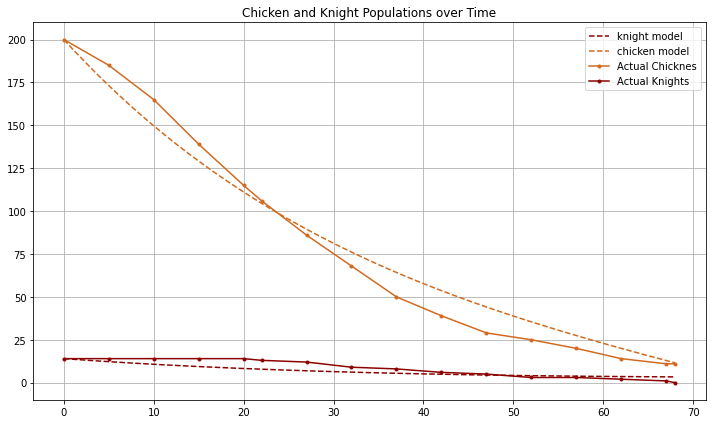

beta = 0.0019
alpha = 0.41


In [ ]:
#p1 = knight, p2 = chick
battletime = timeend
chicklosses = chick0 - chickFinal 
knightlosses = knight0 - knightFinal
beta = 0.0019 #knight loss per chick
alpha = 0.41 #chickloss per knight

def f(t,yvec):
  knpop = yvec[0]  # knightica 
  chickpop = yvec[1] #chickan
  return [-beta*chickpop, -alpha*knpop]

def knightloss(t,yvec):
  return yvec[0]

def chickloss(t,yvec):
  return yvec[1]

TMAX = timeend
y0 = [knight0, chick0] 
t = np.linspace(0, TMAX, num=211)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(knightloss,chickloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
knight = ivp.y[0]
chick = ivp.y[1]

#actual
cdata = np.array([200,185,165,139,115,106,86,68,50,39,29,25,20,14,11,11])
kdata = np.array([14,14,14,14,14,13,12,9,8,6,5,3,3,2,1,0])
tdata = np.array([22,27,32,37,42,44,49,54,59,64,69,74,79,84,89,90])
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 22

plt.figure(figsize=(10,6))
plt.plot(t, knight,'--',color='darkred',label='knight model')
plt.title('Chicken and Knight Populations over Time')
plt.plot(t, chick,'r--',color='chocolate',label='chicken model')
plt.plot(tdata,cdata,'.-',color='chocolate',label="Actual Chicknes")
plt.plot(tdata,kdata,'.-',color='darkred',label='Actual Knights')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(f'beta = {beta}')
print(f'alpha = {alpha}')

In [ ]:
#Error Finding
error = 0
error += abs(knight[210] - kdata[15])
error += abs(chick[210] - cdata[15])
error += abs(knight[140] - kdata[10])
error += abs(chick[140] - cdata[10])
error += abs(knight[70] - kdata[5])
error += abs(chick[70] - cdata[5] )
print(error)

31.402890814801097


Lowest Errors so far: 

beta = 0.0019,
alpha = 0.41 : Error 31.402890814801097

beta = 0.0018, 
alpha = 0.40 : Error 33.66666373536682

# Trying to make a for loop - it didn't work

In [ ]:
min_error = 1e300
best_beta = 100000
best_alpha = 10000000
for j in range(100):
  for i in range(100):
      # chickckknight p1 = knight, p2 = chickattletime = 4 #seconds
    battletime = timeend
    chicklosses = chick0 - chickFinal 
    knightlosses = knight0 - knightFinal
    beta = i*0.001 #knight loss per chick
    alpha = j*0.001 #chickloss per knight

    def f(t,yvec):
      knpop = yvec[0]  # knightica 
      chickpop = yvec[1] #chickan
      return [-beta*chickpop, -alpha*knpop]

    TMAX = timeend
    y0 = [knight0, chick0] 
    t = np.linspace(0, TMAX, num=200)
    ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(knightloss,chickloss))
    #print(ivp.message)
    #print('nfev = ',ivp.nfev)
    #t = ivp.t
    knight = ivp.y[0]
    chick = ivp.y[1]
  
    #actual
    cdata = np.array([200,185,165,139,115,106,86,68,50,39,29,25,20,14,11,11])
    kdata = np.array([14,14,14,14,14,13,12,9,8,6,5,3,3,2,1,0])
    tdata = np.array([22,27,32,37,42,44,49,54,59,64,69,74,79,84,89,90])
    LENloop = len(tdata)
    for i in range(LENloop):
      tdata[i] -= 22
    error = 0
    a = len(knight) + len(chick)
    if a == 422:
        error += abs(knight[210] - kdata[15])
        error += abs(chick[210] - cdata[15])
        error += abs(knight[140] - kdata[10])
        error += abs(chick[140] - cdata[10])
        error += abs(knight[70] - kdata[5])
        error += abs(chick[70] - cdata[5] )
        if error < min_error:
          min_error = error
          best_alpha = alpha
          best_beta = beta
print(min_error)
print(best_alpha)
print(best_beta)

1e+300
10000000
100000


In [ ]:
alpha = np.linspace(0,1,num=1000)
beta = np.linspace(0,1,num=1000)

def f(t,yvec):
  knpop = yvec[0]  # knightica 
  chickpop = yvec[1] #chickan
  return [-beta*chickpop, -alpha*knpop]

TMAX = timeend
y0 = [knight0, chick0] 
t = np.linspace(0, TMAX, num=200)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(knightloss,chickloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
knight = ivp.y[0]
chick = ivp.y[1]


ValueError: ignored

In [ ]:
#actual data
cdata = np.array([200,185,165,139,115,106,86,68,50,39,29,25,20,14,11,11])
kdata = np.array([14,14,14,14,14,13,12,9,8,6,5,3,3,2,1,0])
tdata = np.array([22,27,32,37,42,44,49,54,59,64,69,74,79,84,89,90])
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 22

def f(t,yvec):
  knpop = yvec[0]  # knightica 
  chickpop = yvec[1] #chickan
  return [-beta*chickpop, -alpha*knpop]

t = np.linspace(0, TMAX, num=211)
alpha = 0.000
beta = 0.000
error = 0
min_error = 1e10000
best_alpha = 100
best_beta = 100
#print(t) 0.34170854 per 1
#finding variables
for i in range(1,100):
  for j in range(1,100):
    alpha = i*0.01
    beta = j*0.01
    def f(t,yvec):
      knpop = yvec[0]  # knightica 
      chickpop = yvec[1] #chickan
      return [-beta*chickpop, -alpha*knpop]
    ivp = solve_ivp(f,[0,TMAX],y0, t_eval= t ,events=(knightloss,chickloss))
    knight = ivp.y[0]
    chick = ivp.y[1]
    a = len(knight) + len(chick)
    if a == 422:
      error += abs(knight[210] - kdata[15])
      error += abs(chick[210] - cdata[15])
      error += abs(knight[140] - kdata[10])
      error += abs(chick[140] - cdata[10])
      error += abs(knight[70] - kdata[5])
      error += abs(chick[70] - cdata[5] )
      #print(error)
      if error < min_error:
        min_error = error
        best_alpha = alpha
        best_beta = beta
      #print(error)
      #print(min_error)
      #print('\n')
      error = 0
    else:
      #print(min_error)
      #print(best_alpha)
      #print(best_beta)
      break

print(min_error)
print(best_alpha)
print(best_beta)

KeyboardInterrupt: ignored

In [ ]:
#actual data
cdata = np.array([200,185,165,139,115,106,86,68,50,39,29,25,20,14,11,11])
kdata = np.array([14,14,14,14,14,13,12,9,8,6,5,3,3,2,1,0])
tdata = np.array([22,27,32,37,42,44,49,54,59,64,69,74,79,84,89,90])
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 22

def f(t,yvec):
  knpop = yvec[0]  # knightica 
  chickpop = yvec[1] #chickan
  return [-beta*chickpop, -alpha*knpop]

t = np.linspace(0, TMAX, num=211)
alpha = 0.000
beta = 0.000
error = 0
min_error = 1e10000
best_alpha = 100
best_beta = 100
#print(t) 0.34170854 per 1
#finding variables
for i in range(1,100):
  for j in range(1,100):
    alpha = i*0.01
    beta = j*0.01
    def f(t,yvec):
      knpop = yvec[0]  # knightica 
      chickpop = yvec[1] #chickan
      return [-beta*chickpop, -alpha*knpop]
    ivp = solve_ivp(f,[0,TMAX],y0, t_eval= t ,events=(knightloss,chickloss))
    knight = ivp.y[0]
    chick = ivp.y[1]
    a = len(knight) + len(chick)
    if a == 422:
      error += abs(knight[210] - kdata[15])
      #error += abs(chick[210] - cdata[15])
      error += abs(knight[140] - kdata[10])
      #error += abs(chick[140] - cdata[10])
      error += abs(knight[70] - kdata[5])
      #error += abs(chick[70] - cdata[5] )
      #print(error)
      if error < min_error:
        min_error = error
        best_alpha = alpha
        best_beta = beta
      #print(error)
      #print(min_error)
      #print('\n')
      error = 0
    else:
      #print(min_error)
      #print(best_alpha)
      #print(best_beta)
      break

print(min_error)
print(best_alpha)
print(best_beta)

257.0665353847953
0.01
0.01


In [ ]:
x = 200 / TMAX
tf = 30*x
tf = int(tf)
print('knighticans, chickckanese \n')
print(f'model:  {knight[tf-1]:0.4}')
print(f'actual: {knightFinal}')
print(f'model:  {chick[tf-1]:0.4}')
print(f'actual: {chickFinal}')

knighticans, chickckanese 

model:  5.19e+04
actual: 60000
model:  25.32
actual: 0
